In [1]:
#!/usr/bin/env python
# coding: utf-8

import requests
import re

def generate_response(prompt, max_new_tokens=200):
    # Set the API endpoint URL
    api_url = "http://localhost:8000/generate_follow_up/"  # Update with your actual server URL

    # Prepare the request payload
    prompt_data = {"chat_content": prompt, "max_new_tokens" : max_new_tokens}

    # Send the POST request
    response = requests.post(api_url, json=prompt_data)

    if response.status_code == 200:
        # The request was successful
        generated_text = response.json()["generated_follow_up"]
        # print(f"Generated Text: {generated_text}")
        return generated_text
    else:
        # Something went wrong
        print(f"Error: {response.status_code}, {response.text}")
        return None

prompt_template = \
    """
    You are an expert in rating surveys by single number, tracking the progress of conversation, questions & particpant's answer in the current context.
    Users answer vaguely at times. You can detect when the user has fulfilled your motivation for your question and when not. You dont know how to write english, just numbers.
    
    Question: {main_question}
    Objective of the question: {objectives_left}
    
    Chat history:-
    {chat_history}
    
    Based on your expert understanding you must give a number only on the conversation on how well the particpant's answer has met the objective of the question.
    Answer 1.0 when the conversation completely fullfils the objective, 0.5 if it partially fullfils the objective and 0.0 if it does not fullfill the motivation of the question. \
    Never ever not justify your answer. 
    Give number between 0.0 to 1.0. Values could be 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0 
    """

def objective_met_agent(chat_history, main_question, objectives_left):

    # fetch response from llm
    prompt = prompt_template.format(chat_history=chat_history, main_question=main_question, objectives_left=objectives_left)
    # print("***"+prompt+"***")
    response = generate_response(prompt)

    # Use regular expressions to parse llm output
    end_of_turn_tags = re.findall(r'<start_of_turn>model(.*?)<eos>', response, re.DOTALL)
    # parsed_response = end_of_turn_tags[0].strip().split('\n')[0]
    # print("LLM response :", response)
    parsed_response = find_occurrences(response)
    print(parsed_response)
    return parsed_response.lower() 

import re


def find_occurrences(input_string):
    pattern = r'\b(?:0\.[1-9]|[1-9]\.[0-9]|1\.0)\b'
    occurrences = re.findall(pattern, input_string)
    if len(occurrences)>0:
        return occurrences[-1]
    return 0.0



In [25]:
prompt_template = \
    """
    You are an expert in analysing survey questions & particpant's answer as per given chat history.
    
    Main question: {main_question}
    Objective: {objectives_left}
    
    Chat history:-
    {chat_history}
    
    Based on your analysis you can decide whether or not the particpant's answer meets the objective of the question asked.
    Answer "True" if it meets the objective and "False" if it does not. Only answer True or False and do not try to justify your answer.
    """

def objective_met_agent_old(chat_history, main_question, objectives_left):

    # fetch response from llm
    prompt = prompt_template.format(chat_history=chat_history, main_question=main_question, objectives_left=objectives_left)
    response = generate_response(prompt)

    # Use regular expressions to parse llm output
    end_of_turn_tags = re.findall(r'<start_of_turn>model(.*?)<eos>', response, re.DOTALL)
    parsed_response = end_of_turn_tags[0].strip().split('\n')[0]

    print("Parsed LLM response :", parsed_response)
    return parsed_response.lower() == "true"

In [2]:
import json
test_data = []
with open("om_manual_set_final.json", "r+") as f:
    test_data = json.load(f)
test_data[0].keys()

dict_keys(['conversation', 'main_question', 'objective', 'user_characteristics', 'objective_met'])

In [3]:
true_test = [i for i in test_data if i["objective_met"]==True]
false_test = [i for i in test_data if i["objective_met"]==False]
len(true_test),len(false_test)

(72, 20)

In [26]:
from tqdm import tqdm

true_test_res_old = []
for i in tqdm(true_test, desc="Processing", unit="iteration"):
    try : 
        i["goal_rating"]=float(objective_met_agent_old(i["conversation"],i["main_question"],i["objective"]))
        true_test_res_old.append(i)
    except:
        print("Response failed for {}".format(i))
        # break

Processing:   1%|█▌                                                                                                            | 1/72 [00:06<07:21,  6.22s/iteration]

Parsed LLM response : True


Processing:   3%|███                                                                                                           | 2/72 [00:11<06:55,  5.94s/iteration]

Parsed LLM response : True


Processing:   4%|████▌                                                                                                         | 3/72 [00:15<05:30,  4.78s/iteration]

Parsed LLM response : True


Processing:   6%|██████                                                                                                        | 4/72 [00:20<05:22,  4.74s/iteration]

Parsed LLM response : True


Processing:   7%|███████▋                                                                                                      | 5/72 [00:23<04:54,  4.40s/iteration]

Parsed LLM response : True


Processing:   8%|█████████▏                                                                                                    | 6/72 [00:27<04:35,  4.17s/iteration]

Parsed LLM response : True


Processing:  10%|██████████▋                                                                                                   | 7/72 [00:32<04:41,  4.34s/iteration]

Parsed LLM response : True


Processing:  11%|████████████▏                                                                                                 | 8/72 [00:36<04:44,  4.45s/iteration]

Parsed LLM response : True


Processing:  12%|█████████████▊                                                                                                | 9/72 [00:40<04:24,  4.19s/iteration]

Parsed LLM response : True


Processing:  14%|███████████████▏                                                                                             | 10/72 [00:46<05:00,  4.84s/iteration]

Parsed LLM response : True


Processing:  15%|████████████████▋                                                                                            | 11/72 [00:50<04:33,  4.49s/iteration]

Parsed LLM response : True


Processing:  17%|██████████████████▏                                                                                          | 12/72 [00:54<04:21,  4.36s/iteration]

Parsed LLM response : True


Processing:  18%|███████████████████▋                                                                                         | 13/72 [01:01<05:10,  5.27s/iteration]

Parsed LLM response : True


Processing:  19%|█████████████████████▏                                                                                       | 14/72 [01:06<05:00,  5.17s/iteration]

Parsed LLM response : True


Processing:  21%|██████████████████████▋                                                                                      | 15/72 [01:10<04:33,  4.79s/iteration]

Parsed LLM response : True


Processing:  22%|████████████████████████▏                                                                                    | 16/72 [01:16<04:47,  5.13s/iteration]

Parsed LLM response : True


Processing:  24%|█████████████████████████▋                                                                                   | 17/72 [01:19<04:08,  4.52s/iteration]

Parsed LLM response : True


Processing:  25%|███████████████████████████▎                                                                                 | 18/72 [01:26<04:42,  5.22s/iteration]

Parsed LLM response : True


Processing:  26%|████████████████████████████▊                                                                                | 19/72 [01:30<04:17,  4.87s/iteration]

Parsed LLM response : True


Processing:  28%|██████████████████████████████▎                                                                              | 20/72 [01:34<03:52,  4.47s/iteration]

Parsed LLM response : True


Processing:  29%|███████████████████████████████▊                                                                             | 21/72 [01:37<03:31,  4.15s/iteration]

Parsed LLM response : True


Processing:  31%|█████████████████████████████████▎                                                                           | 22/72 [01:42<03:39,  4.40s/iteration]

Parsed LLM response : True


Processing:  32%|██████████████████████████████████▊                                                                          | 23/72 [01:46<03:24,  4.18s/iteration]

Parsed LLM response : True


Processing:  33%|████████████████████████████████████▎                                                                        | 24/72 [01:50<03:15,  4.08s/iteration]

Parsed LLM response : True


Processing:  35%|█████████████████████████████████████▊                                                                       | 25/72 [01:53<03:06,  3.98s/iteration]

Parsed LLM response : True


Processing:  36%|███████████████████████████████████████▎                                                                     | 26/72 [01:59<03:31,  4.59s/iteration]

Parsed LLM response : True


Processing:  38%|████████████████████████████████████████▉                                                                    | 27/72 [02:04<03:27,  4.62s/iteration]

Parsed LLM response : True


Processing:  39%|██████████████████████████████████████████▍                                                                  | 28/72 [02:08<03:14,  4.42s/iteration]

Parsed LLM response : True


Processing:  40%|███████████████████████████████████████████▉                                                                 | 29/72 [02:13<03:13,  4.49s/iteration]

Parsed LLM response : True


Processing:  42%|█████████████████████████████████████████████▍                                                               | 30/72 [02:16<02:53,  4.12s/iteration]

Parsed LLM response : True


Processing:  43%|██████████████████████████████████████████████▉                                                              | 31/72 [02:22<03:05,  4.53s/iteration]

Parsed LLM response : True


Processing:  44%|████████████████████████████████████████████████▍                                                            | 32/72 [02:26<02:59,  4.48s/iteration]

Parsed LLM response : True


Processing:  46%|█████████████████████████████████████████████████▉                                                           | 33/72 [02:29<02:40,  4.12s/iteration]

Parsed LLM response : True


Processing:  47%|███████████████████████████████████████████████████▍                                                         | 34/72 [02:35<02:58,  4.68s/iteration]

Parsed LLM response : True


Processing:  49%|████████████████████████████████████████████████████▉                                                        | 35/72 [02:40<02:58,  4.83s/iteration]

Parsed LLM response : True


Processing:  50%|██████████████████████████████████████████████████████▌                                                      | 36/72 [02:48<03:20,  5.56s/iteration]

Parsed LLM response : True


Processing:  51%|████████████████████████████████████████████████████████                                                     | 37/72 [02:53<03:12,  5.51s/iteration]

Parsed LLM response : True


Processing:  53%|█████████████████████████████████████████████████████████▌                                                   | 38/72 [02:57<02:51,  5.05s/iteration]

Parsed LLM response : True


Processing:  54%|███████████████████████████████████████████████████████████                                                  | 39/72 [03:02<02:43,  4.94s/iteration]

Parsed LLM response : True


Processing:  56%|████████████████████████████████████████████████████████████▌                                                | 40/72 [03:06<02:34,  4.84s/iteration]

Parsed LLM response : True


Processing:  57%|██████████████████████████████████████████████████████████████                                               | 41/72 [03:10<02:24,  4.65s/iteration]

Parsed LLM response : True


Processing:  58%|███████████████████████████████████████████████████████████████▌                                             | 42/72 [03:15<02:22,  4.76s/iteration]

Parsed LLM response : True


Processing:  60%|█████████████████████████████████████████████████████████████████                                            | 43/72 [03:22<02:33,  5.30s/iteration]

Parsed LLM response : True


Processing:  61%|██████████████████████████████████████████████████████████████████▌                                          | 44/72 [03:28<02:30,  5.37s/iteration]

Parsed LLM response : True


Processing:  62%|████████████████████████████████████████████████████████████████████▏                                        | 45/72 [03:35<02:37,  5.84s/iteration]

Parsed LLM response : True


Processing:  64%|█████████████████████████████████████████████████████████████████████▋                                       | 46/72 [03:40<02:30,  5.80s/iteration]

Parsed LLM response : True


Processing:  65%|███████████████████████████████████████████████████████████████████████▏                                     | 47/72 [03:47<02:33,  6.15s/iteration]

Parsed LLM response : True


Processing:  67%|████████████████████████████████████████████████████████████████████████▋                                    | 48/72 [03:53<02:28,  6.18s/iteration]

Parsed LLM response : True


Processing:  68%|██████████████████████████████████████████████████████████████████████████▏                                  | 49/72 [04:00<02:27,  6.42s/iteration]

Parsed LLM response : True


Processing:  69%|███████████████████████████████████████████████████████████████████████████▋                                 | 50/72 [04:04<02:05,  5.72s/iteration]

Parsed LLM response : True


Processing:  71%|█████████████████████████████████████████████████████████████████████████████▏                               | 51/72 [04:11<02:07,  6.05s/iteration]

Parsed LLM response : True


Processing:  72%|██████████████████████████████████████████████████████████████████████████████▋                              | 52/72 [04:17<01:59,  5.95s/iteration]

Parsed LLM response : True


Processing:  74%|████████████████████████████████████████████████████████████████████████████████▏                            | 53/72 [04:23<01:54,  6.03s/iteration]

Parsed LLM response : True


Processing:  75%|█████████████████████████████████████████████████████████████████████████████████▊                           | 54/72 [04:29<01:45,  5.87s/iteration]

Parsed LLM response : True


Processing:  76%|███████████████████████████████████████████████████████████████████████████████████▎                         | 55/72 [04:33<01:30,  5.33s/iteration]

Parsed LLM response : True


Processing:  78%|████████████████████████████████████████████████████████████████████████████████████▊                        | 56/72 [04:38<01:23,  5.19s/iteration]

Parsed LLM response : True


Processing:  79%|██████████████████████████████████████████████████████████████████████████████████████▎                      | 57/72 [04:43<01:16,  5.13s/iteration]

Parsed LLM response : True


Processing:  81%|███████████████████████████████████████████████████████████████████████████████████████▊                     | 58/72 [04:49<01:17,  5.50s/iteration]

Parsed LLM response : True


Processing:  82%|█████████████████████████████████████████████████████████████████████████████████████████▎                   | 59/72 [04:53<01:06,  5.13s/iteration]

Parsed LLM response : True


Processing:  83%|██████████████████████████████████████████████████████████████████████████████████████████▊                  | 60/72 [04:59<01:02,  5.22s/iteration]

Parsed LLM response : True


Processing:  85%|████████████████████████████████████████████████████████████████████████████████████████████▎                | 61/72 [05:04<00:59,  5.37s/iteration]

Parsed LLM response : True


Processing:  86%|█████████████████████████████████████████████████████████████████████████████████████████████▊               | 62/72 [05:09<00:51,  5.16s/iteration]

Parsed LLM response : True


Processing:  88%|███████████████████████████████████████████████████████████████████████████████████████████████▍             | 63/72 [05:16<00:51,  5.71s/iteration]

Parsed LLM response : True


Processing:  89%|████████████████████████████████████████████████████████████████████████████████████████████████▉            | 64/72 [05:21<00:43,  5.43s/iteration]

Parsed LLM response : True


Processing:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████▍          | 65/72 [05:25<00:36,  5.18s/iteration]

Parsed LLM response : True


Processing:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████▉         | 66/72 [05:30<00:29,  4.87s/iteration]

Parsed LLM response : True


Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 67/72 [05:34<00:23,  4.76s/iteration]

Parsed LLM response : True


Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 68/72 [05:41<00:21,  5.37s/iteration]

Parsed LLM response : True


Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 69/72 [05:45<00:15,  5.01s/iteration]

Parsed LLM response : True


Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 70/72 [05:49<00:09,  4.71s/iteration]

Parsed LLM response : True


Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 71/72 [05:55<00:05,  5.09s/iteration]

Parsed LLM response : True


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [06:00<00:00,  5.01s/iteration]

Parsed LLM response : True


In [27]:
false_test_res_old = []
for i in tqdm(false_test, desc="Processing", unit="iteration"):
    try : 
        i["goal_rating"]=float(objective_met_agent_old(i["conversation"],i["main_question"],i["objective"]))
        false_test_res_old.append(i)
    except:
        print("Response failed for {}".format(i))
        # break

Processing:   5%|█████▌                                                                                                        | 1/20 [00:05<01:43,  5.44s/iteration]

Parsed LLM response : True


Processing:  10%|███████████                                                                                                   | 2/20 [00:11<01:45,  5.86s/iteration]

Parsed LLM response : True


Processing:  15%|████████████████▌                                                                                             | 3/20 [00:16<01:31,  5.37s/iteration]

Parsed LLM response : True


Processing:  20%|██████████████████████                                                                                        | 4/20 [00:24<01:42,  6.41s/iteration]

Parsed LLM response : True


Processing:  25%|███████████████████████████▌                                                                                  | 5/20 [00:30<01:36,  6.42s/iteration]

Parsed LLM response : False. The user's answer "I don't know" does not meet the objective of the question "Do you think the cost of public transportation is fair?". The user has not provided an opinion on the fairness of the cost of public transportation.


Processing:  30%|█████████████████████████████████                                                                             | 6/20 [00:35<01:22,  5.86s/iteration]

Parsed LLM response : True


Processing:  35%|██████████████████████████████████████▌                                                                       | 7/20 [00:40<01:14,  5.70s/iteration]

Parsed LLM response : True


Processing:  40%|████████████████████████████████████████████                                                                  | 8/20 [00:45<01:04,  5.41s/iteration]

Parsed LLM response : True


Processing:  45%|█████████████████████████████████████████████████▌                                                            | 9/20 [00:51<01:02,  5.64s/iteration]

Parsed LLM response : True


Processing:  50%|██████████████████████████████████████████████████████▌                                                      | 10/20 [00:56<00:53,  5.35s/iteration]

Parsed LLM response : True


Processing:  55%|███████████████████████████████████████████████████████████▉                                                 | 11/20 [01:00<00:44,  4.94s/iteration]

Parsed LLM response : True


Processing:  60%|█████████████████████████████████████████████████████████████████▍                                           | 12/20 [01:04<00:37,  4.68s/iteration]

Parsed LLM response : True


Processing:  65%|██████████████████████████████████████████████████████████████████████▊                                      | 13/20 [01:11<00:36,  5.19s/iteration]

Parsed LLM response : True


Processing:  70%|████████████████████████████████████████████████████████████████████████████▎                                | 14/20 [01:18<00:35,  5.92s/iteration]

Parsed LLM response : True


Processing:  75%|█████████████████████████████████████████████████████████████████████████████████▊                           | 15/20 [01:22<00:26,  5.36s/iteration]

Parsed LLM response : True


Processing:  80%|███████████████████████████████████████████████████████████████████████████████████████▏                     | 16/20 [01:31<00:25,  6.34s/iteration]

Parsed LLM response : True


Processing:  85%|████████████████████████████████████████████████████████████████████████████████████████████▋                | 17/20 [01:36<00:17,  5.95s/iteration]

Parsed LLM response : True


Processing:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████           | 18/20 [01:44<00:13,  6.73s/iteration]

Parsed LLM response : True


Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 19/20 [01:51<00:06,  6.74s/iteration]

Parsed LLM response : True


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:57<00:00,  5.87s/iteration]

Parsed LLM response : True


In [8]:
false_test_res

[{'conversation': "Interviewer: I'm sorry to hear that. How far do you have to travel to get to a hospital?\nInterviewee: I have to travel a long distance to get to a hospital.\n",
  'main_question': 'How far do you have to travel to get to a hospital?',
  'objective': 'To know the distance the person has to travel.',
  'user_characteristics': {'Name': 'Amit',
   'Age': 35,
   'Gender': 'Male',
   'Income': 'Low',
   'Education': 'Primary',
   'Location': 'Uttar Pradesh'},
  'objective_met': False,
  'goal_rating': 0.8},
 {'conversation': "Interviewer: I'm sorry to hear that. How far do you have to travel to get to a hospital?\nInterviewee: I have to travel a long distance to get to a hospital.\n",
  'main_question': 'How far do you have to travel to get to a hospital?',
  'objective': 'Was the user answer specific?',
  'user_characteristics': {'Name': 'Amit',
   'Age': 35,
   'Gender': 'Male',
   'Income': 'Low',
   'Education': 'Primary',
   'Location': 'Uttar Pradesh'},
  'objective

In [28]:
with open("om_manual_inferred_true_old.json", "w+") as f:
    json.dump(true_test_res_old, f, indent=4)

with open("om_manual_inferred_false_old.json", "w+") as f:
    json.dump(false_test_res_old, f, indent=4)

In [42]:
# thresh=range(0.0,1.0,0.1)

sum([i["goal_rating"] and i["objective_met"] for i in true_test_res_old])/len(true_test_res_old),\
sum([not i["goal_rating"] and not i["objective_met"] for i in false_test_res_old])/len(false_test_res_old)

(1.0, 0.05)

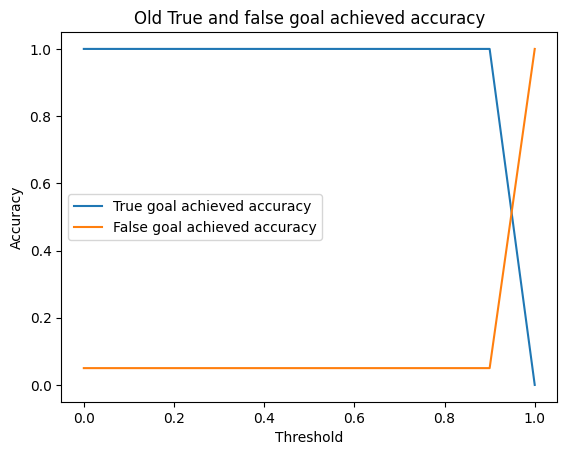

In [38]:

import matplotlib.pyplot as plt

# Given threshold range
thresh_range = [i/10.0 for i in range(11)]

# Calculating the ratios
true_positive_ratios = []
false_positive_ratios = []

for thresh in thresh_range:
    true_positive_ratio = sum(i["goal_rating"] and i["objective_met"] for i in true_test_res_old) / len(true_test_res_old)
    false_positive_ratio = sum(i["goal_rating"] and not i["objective_met"] for i in false_test_res_old) / len(false_test_res_old)
    true_positive_ratios.append(true_positive_ratio)
    false_positive_ratios.append(false_positive_ratio)

# Plotting
plt.plot(thresh_range, true_positive_ratios, label="True goal achieved accuracy")
plt.plot(thresh_range, false_positive_ratios, label="False goal achieved accuracy")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Old True and false goal achieved accuracy")
plt.legend()
plt.show()


In [36]:
import json

# Read true_test_res_old from JSON
with open("om_manual_inferred_true.json", "r") as f:
    true_test_res = json.load(f)

# Read false_test_res_old from JSON
with open("om_manual_inferred_false.json", "r") as f:
    false_test_res = json.load(f)


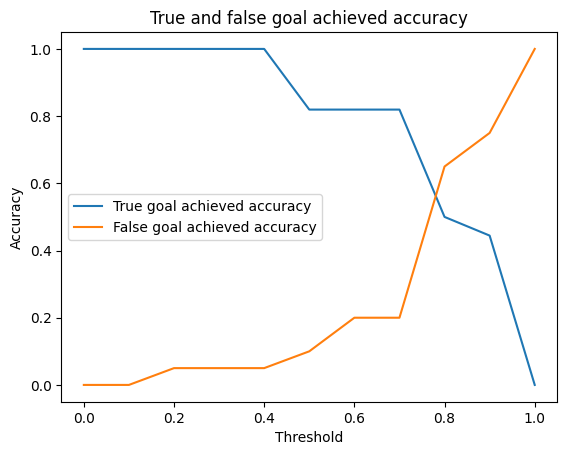

In [37]:

import matplotlib.pyplot as plt

# Given threshold range
thresh_range = [i/10.0 for i in range(11)]

# Calculating the ratios
true_positive_ratios = []
false_positive_ratios = []

for thresh in thresh_range:
    true_positive_ratio = sum(i["goal_rating"] > thresh and i["objective_met"] for i in true_test_res) / len(true_test_res)
    false_positive_ratio = sum(i["goal_rating"] <= thresh and not i["objective_met"] for i in false_test_res) / len(false_test_res)
    true_positive_ratios.append(true_positive_ratio)
    false_positive_ratios.append(false_positive_ratio)

# Plotting
plt.plot(thresh_range, true_positive_ratios, label="True goal achieved accuracy")
plt.plot(thresh_range, false_positive_ratios, label="False goal achieved accuracy")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("True and false goal achieved accuracy")
plt.legend()
plt.show()


## Testing

In [ ]:
objective_met_agent("Interviewer: Hello Ravi, thank you for taking the time to speak with me today. \
Can you tell me if there are any schools in your village?\n\nRavi: Yes, there is a school nearby.\
\n\nInterviewer: That's great to hear. Can you tell me if you face any challenges in attending school?\
\n\nRavi: Well, sometimes I have to help my father on the farm, so I can't always go to school.\
\n\nInterviewer: I understand. nInterviewer: I see. \
Can you tell me what kind of education you aspire to receive?\n\n\
Ravi: I want to learn how to read and write so I can help my family and become a teacher one day.",\
"What kind of education do you aspire to receive?",\
"To understand the aspirations of the individual and how it aligns with the current education system.")

In [40]:
objective_met_agent("Interviewer: Hello Ravi, thank you for taking the time to speak with me today. \
Can you tell me if there are any schools in your village?\n\nRavi: Yes, there is a school nearby.\
\n\nInterviewer: That's great to hear. Can you tell me if you face any challenges in attending school?\
\n\nRavi: Well, sometimes I have to help my father on the farm, so I can't always go to school.\
\n\nInterviewer: I understand. nInterviewer: I see. \
Can you tell me what kind of education you aspire to receive?\n\n\
Ravi: I want to learn how to read and write so I can help my family and become a teacher one day.",\
"What kind of education do you aspire to receive?",\
"To understand the aspirations of the individual and how it aligns with the current education system.")

Parsed LLM response : 0.8


'0.8'

In [41]:
objective_met_agent("Interviewer: Hello Ravi, thank you for taking the time to speak with me today. \
Can you tell me if there are any schools in your village?\n\nRavi: Yes, there is a school nearby.\
\n\nInterviewer: That's great to hear. Can you tell me if you face any challenges in attending school?\
\n\nRavi: Well, sometimes I have to help my father on the farm, so I can't always go to school.\
\n\nInterviewer: I understand. nInterviewer: I see. \
Can you tell me what kind of education you aspire to receive?\n\n\
Ravi: I do not understand",\
"What kind of education do you aspire to receive?",\
"To understand the aspirations of the individual and how it aligns with the current education system.")

Parsed LLM response : 0.2


'0.2'

In [32]:
objective_met_agent("Interviewer: Hello Ravi, thank you for taking the time to speak with me today. \
Can you tell me if there are any schools in your village?\n\nRavi: Yes, there is a school nearby.\
\n\nInterviewer: That's great to hear. Can you tell me if you face any challenges in attending school?\
\n\nRavi: Well, sometimes I have to help my father on the farm, so I can't always go to school.\
\n\nInterviewer: I understand. nInterviewer: I see. \
Can you tell me what kind of education you aspire to receive?\n\n\
Ravi: I want good education",\
"What kind of education do you aspire to receive?",\
"To understand the aspirations of the individual and how it aligns with the current education system.")

Error: 500, {"detail":"CUDA out of memory. Tried to allocate 286.00 MiB. GPU 0 has a total capacity of 15.57 GiB of which 185.38 MiB is free. Including non-PyTorch memory, this process has 15.39 GiB memory in use. Of the allocated memory 14.20 GiB is allocated by PyTorch, and 1.06 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)"}


TypeError: expected string or bytes-like object

In [16]:
import json
file_path = "../journalist-bot/backend/test_bench/bench_persona_qs_goals_with_conversations.json"
with open(file_path, 'r') as file:
    data = json.load(file)
data

[{'Problem': 'Lack of access to education in rural areas of India.',
  'Indian': "Ravi, 12 years old, male, farmer's son, Uttar Pradesh, illiterate",
  'Questions and Motivations': ['Question: Are there any schools in your village?',
   'Motivation: To know if there are any educational facilities available in the village.',
   'Question: Do you face any challenges in attending school?',
   'Motivation: To understand the barriers to education in rural areas.',
   'Question: What kind of education do you aspire to receive?',
   'Motivation: To understand the aspirations of the individual and how it aligns with the current education system.'],
  'Conversation': "Interviewer: Hello Ravi, thank you for taking the time to speak with me today. Can you tell me if there are any schools in your village?\n\nRavi: Yes, there is a school nearby.\n\nInterviewer: That's great to hear. Can you tell me if you face any challenges in attending school?\n\nRavi: Well, sometimes I have to help my father on 

In [18]:
objective_met_agent("Interviewer: Hello Ravi, thank you for taking the time to speak with me today. \
Can you tell me if there are any schools in your village?\n\nRavi: Yes, there is a school nearby.\
\n\nInterviewer: That's great to hear. Can you tell me if you face any challenges in attending school?\
\n\nRavi: Well, sometimes I have to help my father on the farm, so I can't always go to school.\
\n\nInterviewer: I understand. nInterviewer: I see. Can you tell me what kind of education you aspire to receive?\n\nRavi: I want to learn how to read and write so I can help my family and become a teacher one day.",\
"What kind of education do you aspire to receive?",\
"To understand the aspirations of the individual and how it aligns with the current education system.")

Parsed LLM response : **Analysis:**


'**analysis:**'

In [9]:
objective_met_agent("Lack of access to education in rural areas of India.",\
"Are there any schools in your village?'",\
"Maybe")

Parsed LLM response : **Analysis:**


'**analysis:**'

In [ ]:
objective_met_agent("Lack of access to education in rural areas of India.",\
"Are there any schools in your village?'",\
"Probably")